# Principal Component Analysis- PreClass

## What is Principal Component Analysis:
- Principal Component Analysis(PCA) is a complexity reduction technique that tries to reduce it to a smaller set of components representing most of the information in the variables.
- At the conceptual level, PCA indentifies the sets of variables that share the variance and creates a component to represent this variance.
- PCA is useful in any situation if you have large set of variables that are somewhat correlated and you wish to reduce the dimensionality or have the option of using lesser variables. Reduced dimensionality aids in identifying patterns among the components and disitnguishing shared qualities among the columns.

## Why do We use PCA:
- The two main purposes of PCA are:
    - Reducing dimensionality in large datasets,
    - Easily visualization of the datasets for analysis.


In [29]:
from plotnine import *
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

In [9]:
df = pd.read_csv("breast_cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [11]:
len(df.columns)

33

In [12]:
df.drop(columns="Unnamed: 32", inplace=True)

In [14]:
features = df.columns[2:31]
features

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst'],
      dtype='object')

In [15]:
z = StandardScaler()
df[features] = z.fit_transform(df[features])

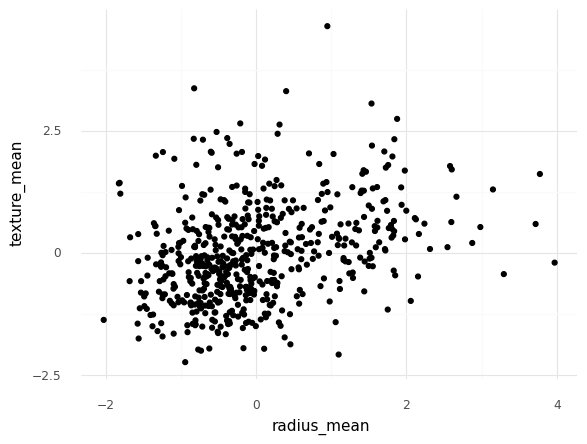

<ggplot: (181309053853)>

In [18]:
(ggplot(df, aes(x = "radius_mean", y = "texture_mean")) + geom_point() + theme_minimal())

In [19]:
pca = PCA()
pca.fit(df[features])

PCA()

In [22]:
df[features].shape

(569, 29)

In [24]:
pcaDF = pd.DataFrame({"expl_var" : pca.explained_variance_ratio_,
                      "pc" : range(1,30),
                      "cum_var" : pca.explained_variance_ratio_.cumsum()})
pcaDF.head(10)

,expl_var,pc,cum_var
0,0.450678,1,0.450678
1,0.182400,2,0.633078
2,0.091593,3,0.724671
3,0.067818,4,0.792489
4,0.056269,5,0.848758
5,0.041359,6,0.890117
6,0.019892,7,0.910009
7,0.016372,8,0.926381
8,0.013971,9,0.940352
9,0.012090,10,0.952442


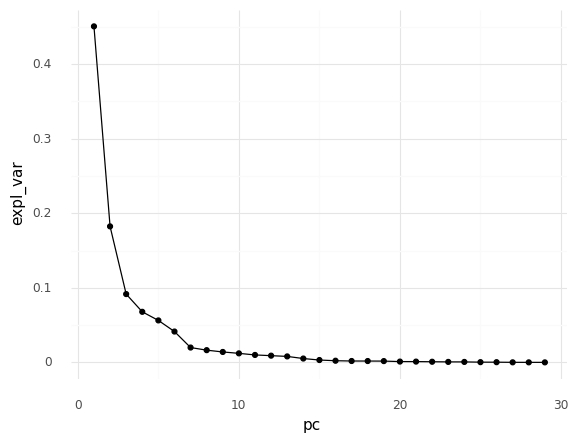

<ggplot: (181315322655)>

In [25]:
(ggplot(pcaDF, aes(x = "pc", y= "expl_var")) + geom_line() + geom_point()+ theme_minimal())

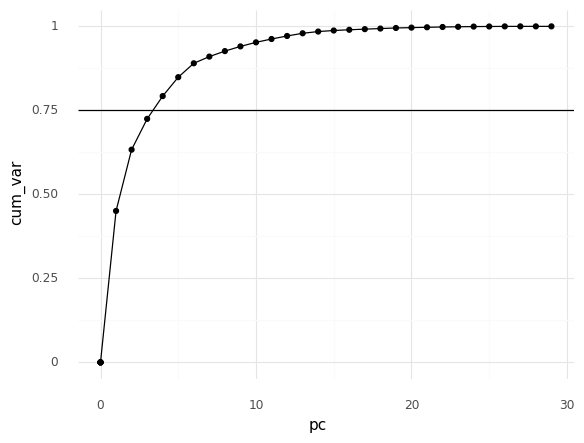

<ggplot: (181315775997)>

In [33]:
pcaDF = pcaDF.append({"expl_var" : 0, "pc" : 0, "cum_var" : 0}, ignore_index=True)
(ggplot(pcaDF, aes(x = "pc", y= "cum_var")) + geom_line() + geom_point()+ theme_minimal() + geom_hline(yintercept = 0.75))

In [41]:
pcomps4 = pca.transform(df[features])
pcomps4 = pd.DataFrame((pcomps4[:, 0:4]))

pcomps10 = pca.transform(df[features])
pcomps10 = pd.DataFrame((pcomps10[:, 0:10]))


lr1 = LogisticRegression()
lr1.fit(df[features], df["diagnosis"])
print("all data    :", lr1.score(df[features], df["diagnosis"]))

lr2 = LogisticRegression()
lr2.fit(pcomps10, df["diagnosis"])
print("10 PCs      :", lr2.score(pcomps10, df["diagnosis"]))

lr3 = LogisticRegression()
lr3.fit(pcomps4, df["diagnosis"])
print("4 PCs       :", lr3.score(pcomps4, df["diagnosis"]))

all data    : 0.9876977152899824
10 PCs      : 0.9876977152899824
4 PCs       : 0.968365553602812


In [46]:
pcomps4.columns = ["PC" + str(i) for i in range(0,4)]
pcomps4.head()

,PC0,PC1,PC2,PC3
0,8.966336,1.984413,-1.499344,3.494055
1,2.463064,-3.856484,-0.100925,1.253424
2,5.777253,-0.841503,-0.698722,0.825640
3,6.283637,9.494189,-3.799607,-0.254932
4,4.077171,-1.544879,1.258651,3.045876


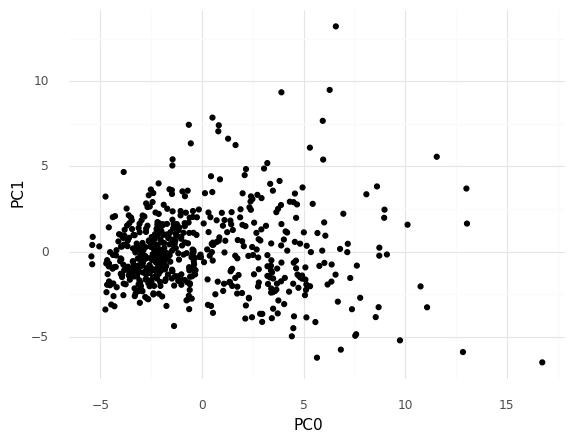

<ggplot: (181319268672)>

In [48]:
(ggplot(pcomps4, aes(x ="PC0", y = "PC1")) + geom_point() + theme_minimal())

In [52]:
loadings = pd.DataFrame({"loading" : pca.components_.flatten(),
                         "comp" : np.repeat(range(1, 30), 29, axis=0),
                         "variable" : np.tile(features, 29)})
loadings.head(29)

,loading,comp,variable
0,0.226590,1,radius_mean
1,0.105675,1,texture_mean
2,0.234804,1,perimeter_mean
3,0.228792,1,area_mean
4,0.139103,1,smoothness_mean
5,0.236629,1,compactness_mean
6,0.258963,1,concavity_mean
7,0.263899,1,concave points_mean
8,0.135222,1,symmetry_mean
9,0.054509,1,fractal_dimension_mean
